<a href="https://colab.research.google.com/github/beriaacan/Machine-Learning-Algorithms/blob/main/Gaussian%20Naive%20Bayes/Gaussian_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Beria Ayşenur CAN 090200705

#Gaussian Naive Bayes

Gaussian Naive Bayes modeli Naive Bayes sınıflandırmasına aittir. Bu algoritmada sürekli (continous) veri ele alınır. Her sınıfla ilişkili sürekli özellikler normal (veya Gaussian) dağılıma göre dağıtılır. Bu yöntem kullanılarak eğitim verisinden her sınıf için ortalama (mean) ve standart sapma (standard deviation) değerleri tahmin edilir. Bu sayede dağılım özetlenir.

Gaussian Naive Bayes algoritmasında her sınıfın olasılıklarına ek olarak her sınıfın ortalama ve standart sapma değerleri de saklanır.
Bayes Teoermi kullanılarak çalışır:

**Bayes Teoremi:**

P(A|B), B olayı gerçekleştiğinde A olayının olasılığını temsil eder ve şu şekilde ifade edilir:
\begin{equation}
    P(A| B) = \frac{P(B|A)\cdot P(A)}{P(B)}
\end{equation}

Gaussian Naive Bayes (GaussianNB) modelini oluşturan bu fonksiyonları sırayla açıklayalım:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB  # Using sklearn's GaussianNB for demonstration


In [46]:
class GaussianNB_:
    def __init__(self, priors=None, var_smoothing=1e-9):
        self.priors = priors
        self.var_smoothing = var_smoothing
        self.theta_ = None
        self.var_ = None
        self.class_priors_ = None
        self.classes_ = None

    def _check_input(self, X):
        """Ensure the input is a numpy array of numeric types."""
        if not isinstance(X, np.ndarray):
            try:
                X = np.array(X, dtype=np.float64)
            except ValueError:
                raise ValueError("Input data X must be a numeric array.")
        return X


    def logprior(self, class_ind):
        return np.log(self.class_priors_[class_ind])

    def loglikelihood(self, Xi, class_ind):
        mean = self.theta_[class_ind]
        var = self.var_[class_ind]

        # Debugging print statements
        #print("Xi type:", type(Xi), "Xi shape:", Xi.shape)
        #print("Mean type:", type(mean), "Mean shape:", mean.shape)
        #print("Var type:", type(var), "Var shape:", var.shape)

        numerator = -0.5 * np.sum(np.log(2. * np.pi * var))
        denominator = -0.5 * np.sum(((Xi - mean) ** 2) / var)
        return numerator + denominator

    def posterior(self, Xi, class_ind):
        return self.logprior(class_ind) + self.loglikelihood(Xi, class_ind)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)

        self.theta_ = np.zeros((n_classes, n_features))
        self.var_ = np.zeros((n_classes, n_features))
        self.class_priors_ = np.zeros(n_classes)

        for c_ind, c_id in enumerate(self.classes_):
            X_class = X[y == c_id]
            self.theta_[c_ind, :] = np.mean(X_class, axis=0)
            self.var_[c_ind, :] = np.var(X_class, axis=0) + self.var_smoothing
            self.class_priors_[c_ind] = np.sum(y == c_id) / n_samples


    def predict(self, X):
        X = self._check_input(X)  # Ensuring X is a NumPy array
        predictions = []
        for xi in X:
            # Debugging: Check the type of xi
            if isinstance(xi, str):
                print("Error: Non-numeric data found:", xi)
                continue

            post = [self.posterior(xi, class_ind) for class_ind in range(len(self.classes_))]
            predictions.append(self.classes_[np.argmax(post)])
        return np.array(predictions)


#örnek kullanım

In [47]:
X = np.array([[1.0, 2.0], [2.0, 3.0], [3.0, 4.0], [4.0, 5.0], [5.0, 6.0], [6.0, 7.0]])
y = np.array([0, 1, 0, 1, 0, 1])

In [48]:
model = GaussianNB_()
model.fit(X, y)


In [49]:
new_data = np.array([[2.5, 3.5], [4.5, 5.5]])

# Make predictions
predictions = model.predict(new_data)

print("Predictions:", predictions)

Predictions: [0 1]


In [50]:
# Veri setini eğitim ve doğrulama setlerine ayırma
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli eğitim setiyle eğitme
model.fit(X_train, y_train)

# Doğrulama seti üzerinde tahmin yapma
y_pred = model.predict(X_val)

# Başarı metriklerini hesaplama
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.5
Confusion Matrix:
 [[1 0]
 [1 0]]


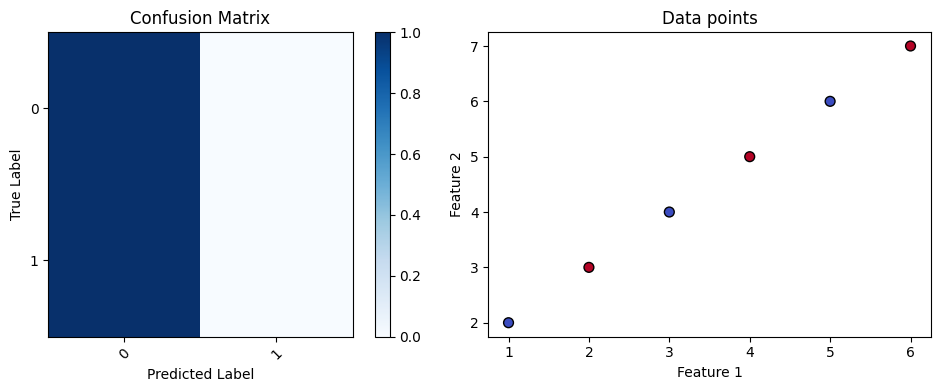

Accuracy: 0.5


In [51]:
# Plotting the results
plt.figure(figsize=(10, 4))

# Plotting confusion matrix
plt.subplot(1, 2, 1)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Plotting samples
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=50)
plt.title('Data points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Printing accuracy
print("Accuracy:", accuracy)

In [ ]:
model_=GaussianNB()
model_.fit(X,y)

In [53]:
new_data = np.array([[2.5, 3.5], [4.5, 5.5]])

# Make predictions
predictions = model_.predict(new_data)

print("Predictions:", predictions)

Predictions: [0 1]


In [54]:
# Veri setini eğitim ve doğrulama setlerine ayırma
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli eğitim setiyle eğitme
model_.fit(X_train, y_train)

# Doğrulama seti üzerinde tahmin yapma
y_pred = model_.predict(X_val)

# Başarı metriklerini hesaplama
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.5
Confusion Matrix:
 [[1 0]
 [1 0]]


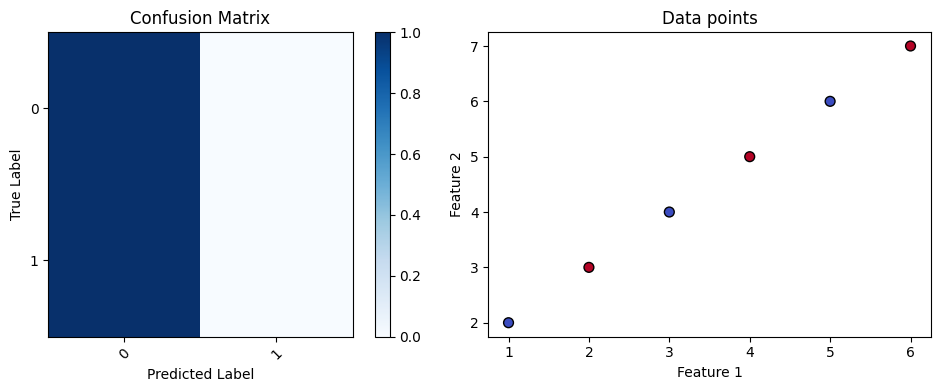

Accuracy: 0.5


In [ ]:
# Plotting the results
plt.figure(figsize=(10, 4))

# Plotting confusion matrix
plt.subplot(1, 2, 1)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Plotting samples
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=50)
plt.title('Data points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Printing accuracy
print("Accuracy:", accuracy)

hazır kütüphane ile de kontrol ettim her iki sonuçta da aynı çıkması yöntemin doğruluğunu kanıtlıyor.